In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from Evaluator import WRMSSEEvaluator
from Dashboard import create_dashboard

## The notebook is for evaluation on the validation set(d_1886 - d_1913) and displaying the dashboard

In [3]:
train_path = '../m5-forecasting-accuracy/sales_train_validation.csv'
calendar_path = '../m5-forecasting-accuracy/calendar.csv'
prices_path = '../m5-forecasting-accuracy/sell_prices.csv'

### Get Weights for the validation fold(d_1886 - d_1913)

In [4]:
%%time

train_df = pd.read_csv(train_path)
calendar = pd.read_csv(calendar_path)
prices = pd.read_csv(prices_path)

train_fold_df = train_df.iloc[:, :-28]
valid_fold_df = train_df.iloc[:, -28:].copy()

evaluator = WRMSSEEvaluator(train_fold_df, valid_fold_df, calendar, prices)
del train_fold_df, train_df, calendar, prices


CPU times: user 50 s, sys: 8.62 s, total: 58.7 s
Wall time: 1min 1s


In [5]:
evaluator.weights

,Weight,Level_id
all,1.000000,1.0
CA,0.433750,2.0
TX,0.279369,2.0
WI,0.286881,2.0
CA_1,0.109100,3.0
...,...,...
HOUSEHOLD_2_516--TX_2,0.000016,12.0
HOUSEHOLD_2_516--TX_3,0.000008,12.0
HOUSEHOLD_2_516--WI_1,0.000003,12.0
HOUSEHOLD_2_516--WI_2,0.000002,12.0


### Given prediction for d_1886 to d_1913 and calculate the WRMSSE score

In [8]:
valid_preds

,item_id,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001,0.952705,0.850338,0.823048,0.843375,1.026264,1.204199,1.224180,0.929051,0.829965,...,1.008801,1.216163,1.217403,0.931003,0.861791,0.822816,0.816962,0.989614,1.189478,1.163933
1,HOBBIES_1_002,0.245467,0.227039,0.230246,0.241210,0.313339,0.415479,0.441694,0.323160,0.292802,...,0.343255,0.482541,0.483556,0.332089,0.309487,0.298844,0.306971,0.378921,0.494187,0.482457
2,HOBBIES_1_003,0.350022,0.328028,0.335480,0.362334,0.521736,0.748555,0.594675,0.390724,0.380677,...,0.426442,0.566615,0.543444,0.331106,0.311591,0.312807,0.325469,0.432766,0.587835,0.578839
3,HOBBIES_1_004,2.001339,1.838295,1.768156,1.809154,2.415960,2.846093,3.168276,2.317713,1.870276,...,2.221090,3.038979,3.033856,2.191402,1.794313,1.862784,1.981230,2.376150,3.218360,3.279906
4,HOBBIES_1_005,0.795388,0.959517,0.978213,1.002873,1.199370,1.541476,1.457692,1.095700,0.984983,...,1.215706,1.520349,1.458246,1.043624,0.937947,0.956135,0.965967,1.176956,1.489300,1.385491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823,0.069840,0.299502,0.434587,0.416313,0.548840,0.761282,0.775891,0.492601,0.640160,...,0.715703,0.599050,0.614165,0.454180,0.446109,0.445030,0.444868,0.542912,0.675229,0.699647
30486,FOODS_3_824,0.014560,0.286110,0.479780,0.476131,0.715503,0.801987,0.759588,0.469991,0.632400,...,0.615635,0.566561,0.569085,0.433524,0.425974,0.412029,0.415662,0.495360,0.613977,0.614712
30487,FOODS_3_825,0.726960,0.712053,0.683612,0.707561,0.999789,1.420513,1.614994,0.991166,1.229876,...,1.163890,0.982288,0.992939,0.789088,0.727056,0.683514,0.675448,0.824760,0.969952,1.007688
30488,FOODS_3_826,1.119182,0.917809,0.888585,0.911790,1.176217,1.554572,1.547133,1.147069,1.314501,...,1.342875,1.243232,1.201533,0.931876,0.969767,0.936780,0.951103,1.105942,1.210032,1.292935


In [7]:
# Suppose given all zero predictions
# valid_preds = np.zeros(shape = valid_fold_df.shape)
valid_preds = pd.read_csv('../m5-forecasting-accuracy/submission_valid_new.csv')
preds = valid_preds.iloc[:, 1:].to_numpy()
print("The WRMSSE score is {}".format(evaluator.score(preds)))

The WRMSSE score is 0.8502283479025604


### Creating dashboard for different level performance

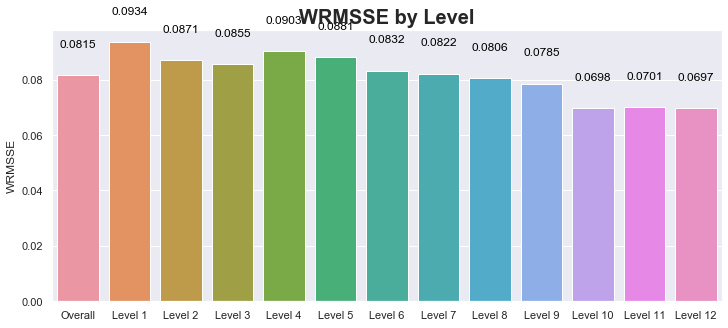

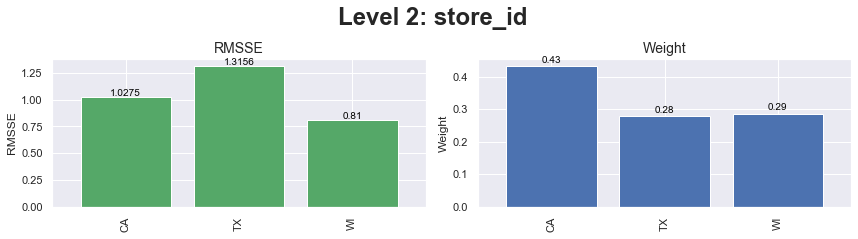

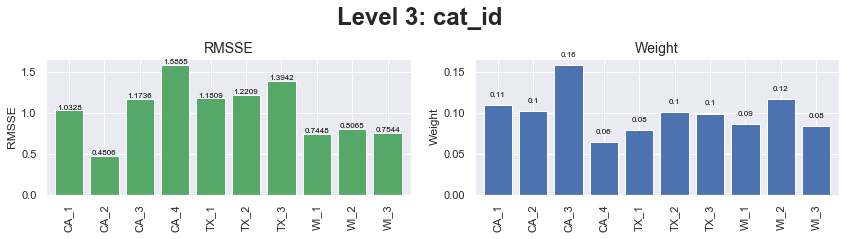

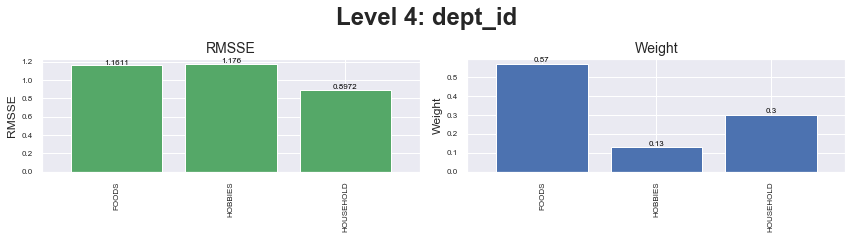

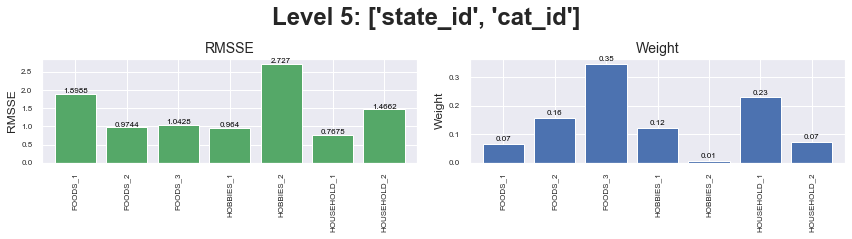

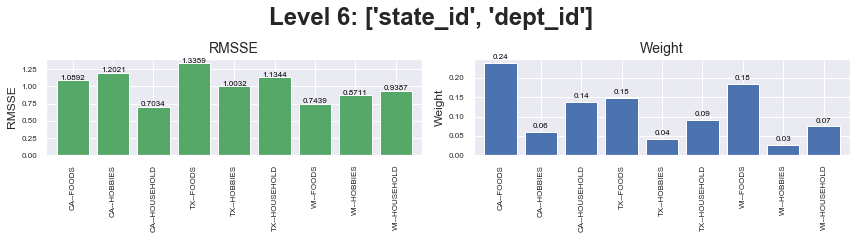

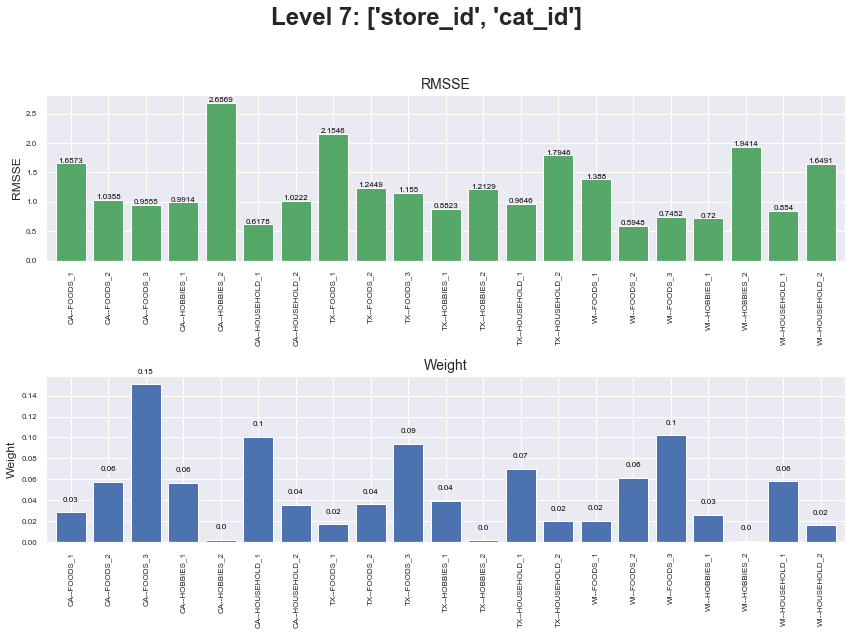

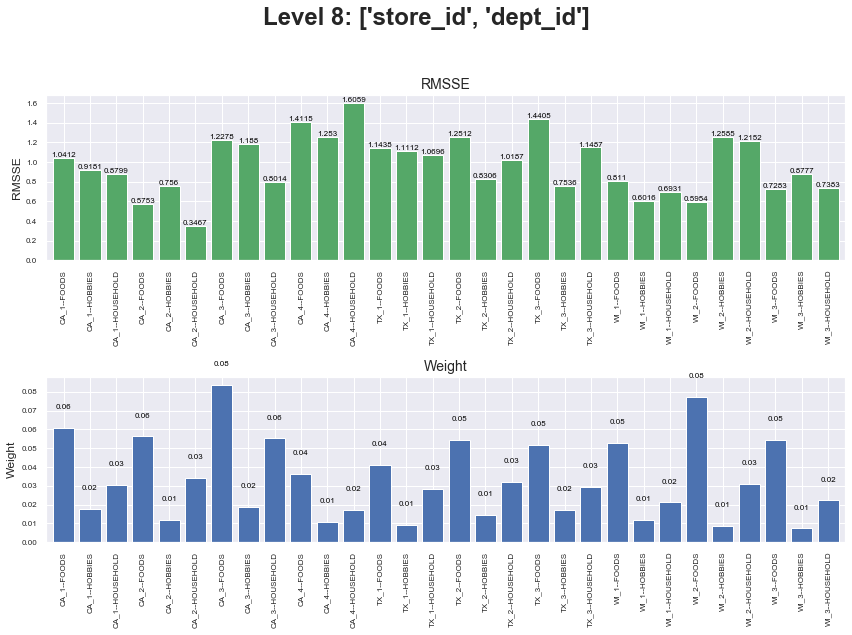

In [9]:
create_dashboard(evaluator)

In [2]:
train_df = pd.read_csv('../m5-forecasting-accuracy/preprocessed_train_new.csv')

In [6]:
inds = np.random.choice(train_df.index.values,44_500_000, replace = False)
train_small = train_df.loc[inds]
print('fi nish selecting')
train_small.to_csv('../m5-forecasting-accuracy/preprocessed_train_small.csv', index=False)

finish selecting
